In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import numpy
from tqdm import tqdm
import numpy as np
from sklearn.metrics.pairwise import euclidean_distances


x,y = make_classification(n_samples=10000, n_features=2, n_informative=2, n_redundant= 0, n_clusters_per_class=1, random_state=60)
X_train, X_test, y_train, y_test = train_test_split(x,y,stratify=y,random_state=42)

In [ ]:
len(X_train)

7500

In [ ]:
len(X_test)

2500

In [ ]:
len(y_train)

7500

In [ ]:
len(y_test)

2500

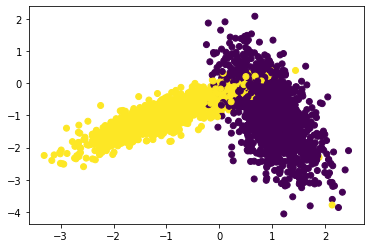

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
colors = ['pink','purple']
#import matplotlib
#plt.scatter(X_test[:,0], X_test[:,1],c=y_test,cmap=matplotlib.colors.ListedColormap(colors))
plt.scatter(X_test[:,0], X_test[:,1],c=y_test)
plt.show()

In [ ]:
# it will take classifier and set of values for hyper prameter in dict type dict({hyper parmeter: [list of values]})
# we are implementing this only for KNN, the hyper parameter should n_neighbors
import random  ## imported this coz off (random name not fornd)
from sklearn.metrics import accuracy_score

#3 we dont need from here 
def randomly_select_60_percent_indices_in_range_from_1_to_len(x_train): 
    return random.sample(range(0, len(x_train)), int(0.6*len(x_train))) 
#3 to here as we arent using it


def RandomSearchCV(x_train,y_train,classifier, params, folds):
    params_rang = random.sample(range(1, params_range),10)
    params_rang.sort()
    print(params_rang)  # remove this line
    params = {'n_neighbors':params_rang}
    print(params)

    trainscores = []
    testscores  = []   
    for k in tqdm(params['n_neighbors']):
        trainscores_folds = []
        testscores_folds  = []

        for j in range(0, folds):
            # 4
            test_indices = list(set(list(range(((int(len(x_train)/ (folds)))*j), ((int(len(x_train)/ (folds)))*(j+1)))))) # this is from kaggle BUT COMPLEATELY MODIFIED
            train_indices  = list(set(list(range(1, len(x_train)))) - set(test_indices))  # i swaped train and test for no reason
            # 4
            X_train = x_train[train_indices]
            Y_train = y_train[train_indices]
            X_test  = x_train[test_indices]
            Y_test  = y_train[test_indices]

            classifier.n_neighbors = k
            classifier.fit(X_train,Y_train)

            Y_predicted = classifier.predict(X_test)
            testscores_folds.append(accuracy_score(Y_test, Y_predicted))

            Y_predicted = classifier.predict(X_train)
            trainscores_folds.append(accuracy_score(Y_train, Y_predicted))
        trainscores.append(np.mean(np.array(trainscores_folds)))
        testscores.append(np.mean(np.array(testscores_folds)))
    #print ('END OF ONE LOOP')
    return trainscores,testscores,params

In [ ]:
from sklearn.metrics import accuracy_score                                            
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
import random
import warnings
warnings.filterwarnings("ignore")
neigh = KNeighborsClassifier()
##################################################################### task 1 below
#params = {'n_neighbors':[3,5,7,9,11,13,15,17,19,21,23]}            

# random sample source is from https://stackoverflow.com/a/9755548/4084039 given in Applied ai refference     
#param_range = random.sample(range(50), 10)
#param_range = np.sort(param_range)            # for sorting
#param_range = list(param_range)               # for sorting
#params = {'n_neighbors':param_range}                                                                          
#######################################################################                                       
params_range = 50  # set param range
folds = 3         # set folds range

testscores,trainscores,params = RandomSearchCV(X_train, y_train, neigh, params_range, folds)

  0%|          | 0/10 [00:00<?, ?it/s]

[5, 7, 15, 18, 27, 33, 34, 36, 43, 46]
{'n_neighbors': [5, 7, 15, 18, 27, 33, 34, 36, 43, 46]}


100%|██████████| 10/10 [00:08<00:00,  1.25it/s]


In [ ]:
print(params)         
print(trainscores)    
print(testscores)     

{'n_neighbors': [5, 7, 15, 18, 27, 33, 34, 36, 43, 46]}
[0.9495999999999999, 0.9518666666666666, 0.9540000000000001, 0.9546666666666667, 0.9538666666666668, 0.9557333333333333, 0.9561333333333333, 0.9556, 0.9564, 0.9561333333333334]
[0.9624616123224644, 0.9607947189437888, 0.9589278389011135, 0.9575943188637727, 0.9573942655197706, 0.9575942788557711, 0.9579276255251051, 0.9580610122024406, 0.9580609855304395, 0.9579277188771087]


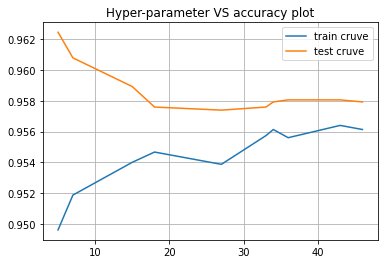

In [ ]:
plt.plot(params['n_neighbors'],trainscores, label='train cruve')    
plt.plot(params['n_neighbors'],testscores, label='test cruve')
plt.title('Hyper-parameter VS accuracy plot')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# understanding this code line by line is not that importent                         
def plot_decision_boundary(X1, X2, y, clf):
        # Create color maps
    cmap_light = ListedColormap(['#FFAAAA', '#AAFFAA', '#AAAAFF'])
    cmap_bold = ListedColormap(['#FF0000', '#00FF00', '#0000FF'])

    x_min, x_max = X1.min() - 1, X1.max() + 1
    y_min, y_max = X2.min() - 1, X2.max() + 1
    
    xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.02), np.arange(y_min, y_max, 0.02))
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)

    plt.figure()
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light)
    # Plot also the training points
    plt.scatter(X1, X2, c=y, cmap=cmap_bold)
    
    plt.xlim(xx.min(), xx.max())
    plt.ylim(yy.min(), yy.max())
    plt.title("2-Class classification (k = %i)" % (clf.n_neighbors))
    plt.show()

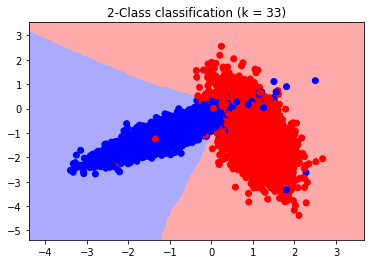

In [ ]:
from matplotlib.colors import ListedColormap          
neigh = KNeighborsClassifier(n_neighbors = 33)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)

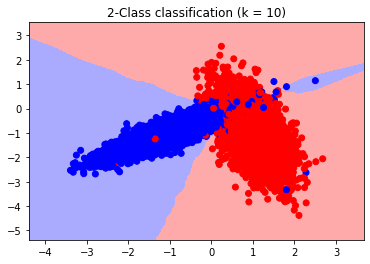

In [ ]:
# this is new from kaggle                                                                 
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 10)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)

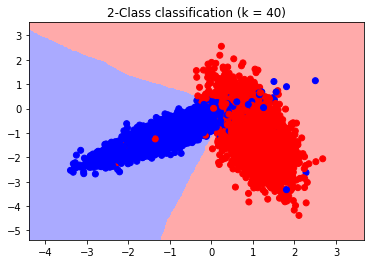

In [ ]:
# this is new kaggle     
from matplotlib.colors import ListedColormap
neigh = KNeighborsClassifier(n_neighbors = 40)
neigh.fit(X_train, y_train)
plot_decision_boundary(X_train[:, 0], X_train[:, 1], y_train, neigh)

In [ ]:
dir(plt)

['Annotation',
 'Arrow',
 'Artist',
 'AutoLocator',
 'Axes',
 'Button',
 'Circle',
 'Figure',
 'FigureCanvasBase',
 'FixedFormatter',
 'FixedLocator',
 'FormatStrFormatter',
 'Formatter',
 'FuncFormatter',
 'GridSpec',
 'IndexLocator',
 'Line2D',
 'LinearLocator',
 'Locator',
 'LogFormatter',
 'LogFormatterExponent',
 'LogFormatterMathtext',
 'LogLocator',
 'MaxNLocator',
 'MultipleLocator',
 'Normalize',
 'NullFormatter',
 'NullLocator',
 'Number',
 'PolarAxes',
 'Polygon',
 'Rectangle',
 'ScalarFormatter',
 'Slider',
 'Subplot',
 'SubplotTool',
 'Text',
 'TickHelper',
 'Widget',
 '_INSTALL_FIG_OBSERVER',
 '_IP_REGISTERED',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__loader__',
 '__name__',
 '__package__',
 '__spec__',
 '_auto_draw_if_interactive',
 '_backend_mod',
 '_get_running_interactive_framework',
 '_interactive_bk',
 '_log',
 '_pylab_helpers',
 '_setp',
 '_setup_pyplot_info_docstrings',
 '_show',
 'acorr',
 'angle_spectrum',
 'annotate',
 'arrow',
 'autoscale',